In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fit_func(vs):
    # paraboloid with minimum of 0 at (c, d) 
    #c, d = -2, 9
    #z = (vs[0] - c)**2 + (vs[1] - d)**2 
    
    # unmodal function with minimum of -1 at (pi,pi)
    #z = -np.cos(vs[0]) * np.cos(vs[1]) * np.exp(-((vs[0] - np.pi)**2 + (vs[1] - np.pi)**2))
    
    # ackley function with mininimum of 0 at (0, 0)
    z = -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (vs[0]**2 + vs[1]**2))) - np.exp(0.5 * (np.cos(2 * np.pi * vs[0]) + np.cos(2 * np.pi * vs[1]))) + np.e + 20
    return z

In [16]:
### Implemented from describitons in "Practical Genetic Algorithms" 

# Fitness function parameters
dims = 2
lims = [(-5, 5, dim) for dim in range(dims)]

# Algorithm parameters
n_pop = 10 # number of chromosomes / population size
iterations = 10
x_rate = 0.5 # Percentage of population to kill off between generations
mutation_rate = 0.2 # percentage of variable that can be mutated, not including the best chromosome variables

#Derived parameters
n_keep = int(np.ceil(n_pop * x_rate)) # number of chromosomes to keep
total_mutations = int(np.ceil(dims * (n_pop - 1) * mutation_rate)) # Exclude 1 chromosome, the best, due to elitism

# Create inital population of chromosomes
chromosomes = np.zeros(shape = (n_pop, dims))
for lim_low, lim_up, dim in lims: 
    chromosomes[:,dim] = np.random.uniform(lim_low, lim_up, n_pop) 
    
# Compute cumulative probabilities using ranked weighting
ranked_weights = []
sum_n = sum([n for n in range(1, n_keep + 1)])
p_cumulative = 0
for i in range(1, n_keep + 1):
    p = (n_keep + 1 - i) / sum_n
    p_cumulative += p 
    ranked_weights.append(p_cumulative)

# for visualizing data 
best_points = []

for i in range(iterations): 
    # Sort by fittest chromosomes in descending order (smallest value ranked 1)
    chromosomes = np.array(sorted(chromosomes, key = lambda x: fit_func(x)))
    
    # pair chromosomes and mate them to produce ofspring until population restored. 
    offspring_created = 0
    n_replace = n_pop - n_keep
    while offspring_created < n_replace: 
        
        # select parents among n_keep best chromosomes according to ranked probabilities. If both indexes are the same, redraw
        index_p1, index_p2 = None, None
        while index_p1 == index_p2: 
            index_p1 = next(x[0] for x in enumerate(ranked_weights) if x[1] > np.random.rand())
            index_p2 = next(x[0] for x in enumerate(ranked_weights) if x[1] > np.random.rand())
        
        # find a randomly selected crossover point
        cp = int(np.ceil(np.random.rand() * dims) - 1)
   
        # add first offspring - Method for creating offspring uses a combination of extrapolation and crossover 
        beta = np.random.rand()
        p_new1 = chromosomes[index_p1, cp] - beta * (chromosomes[index_p1, cp] - chromosomes[index_p2, cp])
        offspring_index = n_keep + offspring_created
        chromosomes[offspring_index, ] = np.concatenate((chromosomes[index_p1, :cp], p_new1 ,chromosomes[index_p2, cp + 1:]), axis = None)
        offspring_created += 1
        
        # If no more offspring needed break loop, else add second offspring
        if offspring_created == n_replace: break
        
        # NOTICE: parents swap sides
        p_new2 = chromosomes[index_p2, cp] + beta * (chromosomes[index_p1, cp] - chromosomes[index_p2, cp])
        offspring_index = n_keep + offspring_created
        chromosomes[offspring_index, ] = np.concatenate((chromosomes[index_p2, :cp], p_new2 ,chromosomes[index_p1, cp + 1:]), axis = None)
        offspring_created += 1
        
    # Create mutatations in range allowed for the given mutated variable
    for mutation in range(total_mutations):
        row = np.random.randint(low = 1, high = n_pop)
        column = np.random.randint(dims)
        chromosomes[row, column] = np.random.uniform(low = lims[column][0], high = lims[column][1])
        
    best_points.append(chromosomes[0,]) #data for visualization 

        
print("The best position: ", chromosomes[0,])  
print("Value at best position: ", fit_func(chromosomes[0,]))


The best position:  [ 0.04974329 -0.15453382]
Value at best position:  1.038159832063922


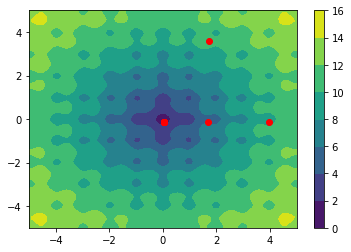

In [17]:
back_x = np.linspace(-5, 5, 100)
back_y = np.linspace(-5, 5, 100)

X, Y = np.meshgrid(back_x, back_y)
Z = fit_func([X, Y])

plt.contourf(X, Y, Z, cmap='viridis');
plt.colorbar();

x = [point[0] for point in chromosomes]
y = [point[1] for point in chromosomes]
plt.scatter(x, y, color = "Red")
plt.show()

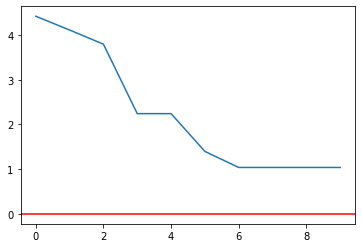

In [18]:
# fitness for best points
fitness_vals = [fit_func(x) for x in best_points]
plt.plot(fitness_vals)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()